<a href="https://colab.research.google.com/github/ABBU2712/Open-Source-Kornia/blob/main/Tutorial_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kornia

     |████████████████████████████████| 296kB 5.0MB/s 
     |████████████████████████████████| 14.6MB 201kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import cv2

from kornia import augmentation as K
from kornia.augmentation import PatchSequential, ImageSequential
from kornia.geometry import bbox_to_mask
from kornia.utils import image_to_tensor, tensor_to_image
from torchvision.transforms import transforms

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()

/usr/local/lib/python3.7/dist-packages/kornia/augmentation/augmentation.py:1875: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,


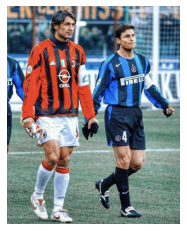

In [6]:
def plot_resulting_image(img, bbox, keypoints, mask):
    img = img * mask
    img_draw = cv2.polylines(np.array(to_pil(img)), bbox.numpy(), isClosed=True, color=(255, 0, 0))
    for k in keypoints[0]:
        img_draw = cv2.circle(img_draw, tuple(k.numpy()[:2]), radius=6, color=(255, 0, 0), thickness=-1)
    return img_draw

img = cv2.imread("Marco.jpeg", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w = img.shape[:2]

img_tensor = image_to_tensor(img).float() / 255.
plt.imshow(img); plt.axis('off');

/usr/local/lib/python3.7/dist-packages/kornia/utils/helpers.py:96: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  out1, out2 = torch.solve(input.to(dtype), A.to(dtype))


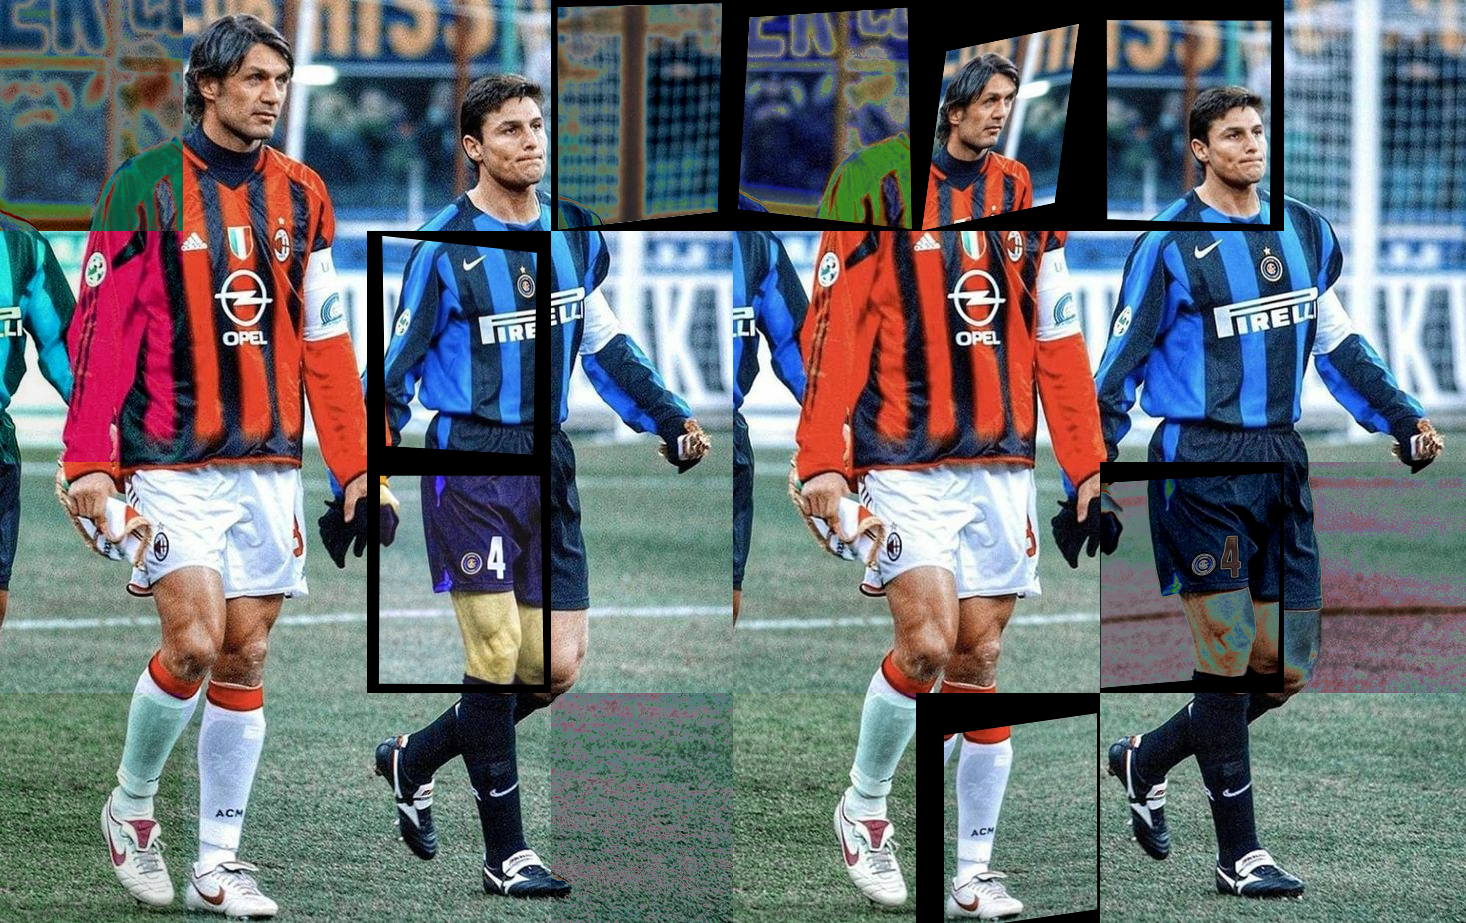

In [8]:
pseq = PatchSequential(
    ImageSequential(
        K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
        K.RandomPerspective(0.2, p=0.5),
        K.RandomSolarize(0.1, 0.1, p=0.5),
    ),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0., 20.], p=0.5),
    K.RandomPerspective(0.2, p=0.5),
    ImageSequential(
        K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
        K.RandomPerspective(0.2, p=0.5),
        K.RandomSolarize(0.1, 0.1, p=0.5),
    ),
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0., 20.], p=0.5),
    K.RandomPerspective(0.2, p=0.5),
    K.RandomSolarize(0.1, 0.1, p=0.5),
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0., 20.], p=0.5),
    ImageSequential(
        K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
        K.RandomPerspective(0.2, p=0.5),
        K.RandomSolarize(0.1, 0.1, p=0.5),
    ),
    K.RandomSolarize(0.1, 0.1, p=0.5),
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.5),
    K.RandomAffine(15, [0.1, 0.1], [0.7, 1.2], [0., 20.], p=0.5),
    K.RandomPerspective(0.2, p=0.5),
    K.RandomSolarize(0.1, 0.1, p=0.5),
    patchwise_apply=True,
    same_on_batch=True,
)
out_tensor = pseq(img_tensor[None].repeat(2, 1, 1, 1))
to_pil(torch.cat([out_tensor[0], out_tensor[1]], dim=2))

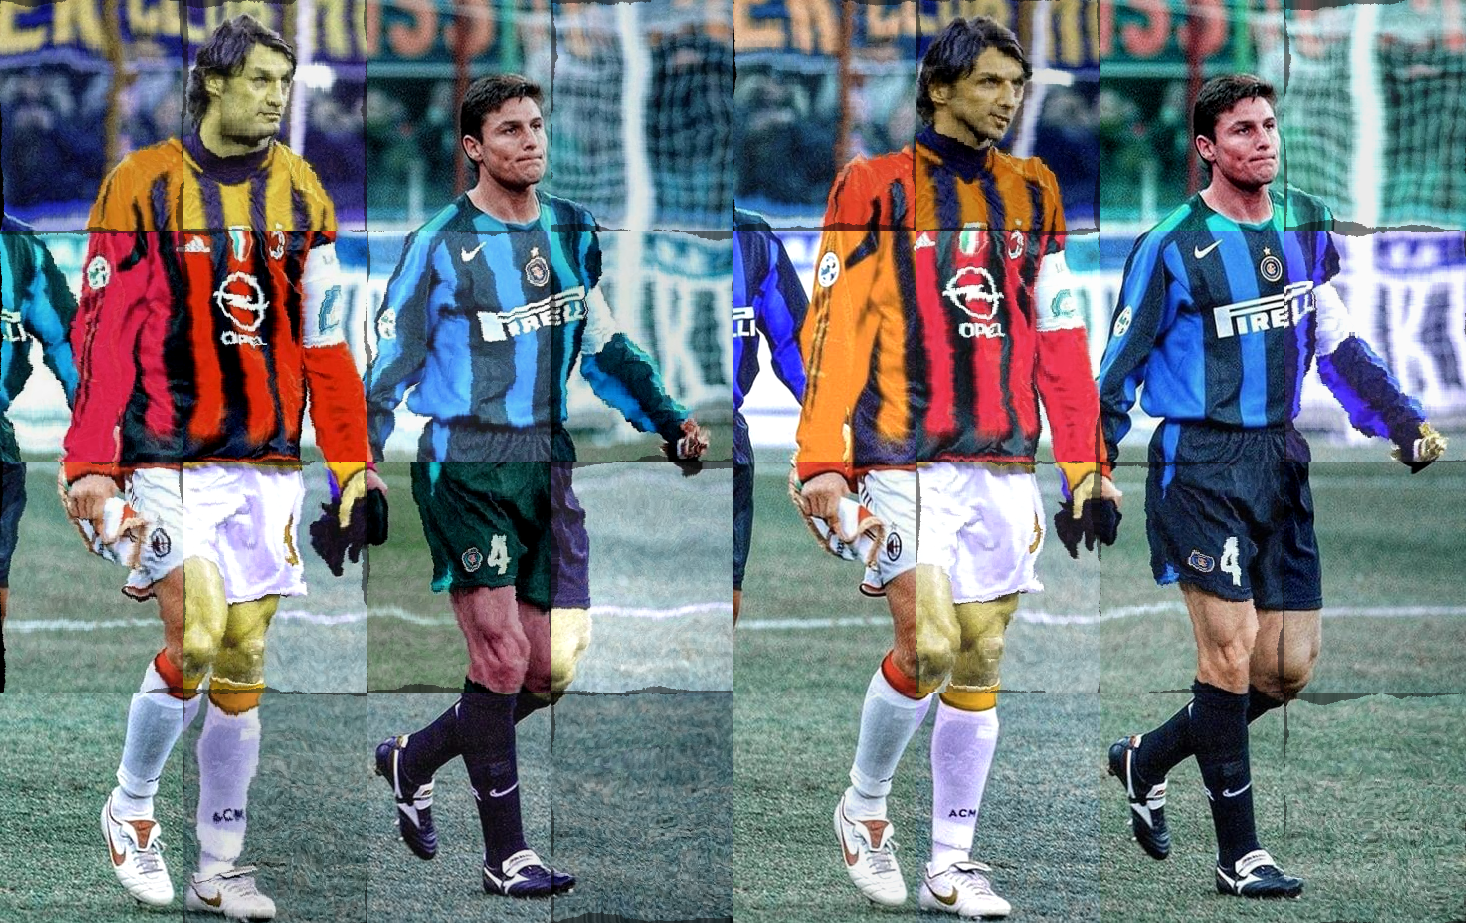

In [9]:
pseq = PatchSequential(
    K.ColorJitter(0.1, 0.1, 0.1, 0.1, p=0.75),
    K.RandomElasticTransform(alpha=(4., 4.)),
    patchwise_apply=False,
    same_on_batch=False
)
out_tensor = pseq(img_tensor[None].repeat(2, 1, 1, 1))
to_pil(torch.cat([out_tensor[0], out_tensor[1]], dim=2))